In [1]:
import cv2
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

In [2]:
img = cv2.imread("data/dataset-2/train/images/snapshot 12 èáßßá-02_12_23_10_11_19_320_60.png", )
img.shape

(640, 640, 3)

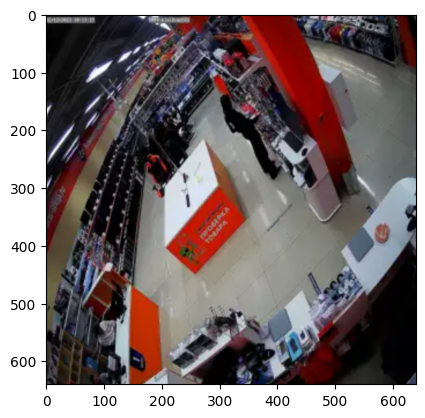

In [3]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

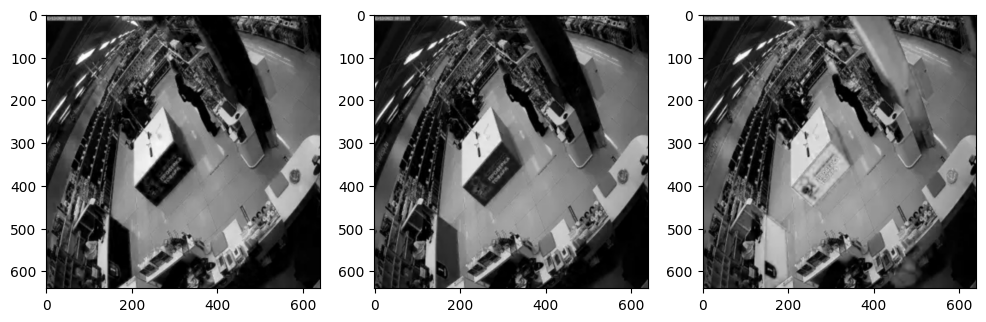

In [4]:
b, g, r = cv2.split(img)
plt.figure(figsize=(12,12))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(b, cv2.COLOR_BGR2RGB))
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(g, cv2.COLOR_BGR2RGB))
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(r, cv2.COLOR_BGR2RGB))
plt.show()

In [5]:
resize_b = cv2.resize(b, (320, 320))
resize_g = cv2.resize(g, (320, 320))
resize_r = cv2.resize(r, (320, 320))

mapper_b = PCA(80, svd_solver="randomized")
mapper_b.fit(resize_b)
transform_b = mapper_b.transform(resize_b)

mapper_g = PCA(80, svd_solver="randomized")
mapper_g.fit(resize_g)
transform_g = mapper_g.transform(resize_g)

mapper_r = PCA(80, svd_solver="randomized")
mapper_r.fit(resize_r)
transform_r = mapper_r.transform(resize_r)

In [6]:
encode_param = [int(cv2.IMWRITE_WEBP_QUALITY), 60]
_, imgencode_b = cv2.imencode(".webp", transform_b, encode_param)

encode_param = [int(cv2.IMWRITE_WEBP_QUALITY), 60]
_, imgencode_g = cv2.imencode(".webp", transform_g, encode_param)

encode_param = [int(cv2.IMWRITE_WEBP_QUALITY), 60]
_, imgencode_r = cv2.imencode(".webp", transform_r, encode_param)

In [7]:
new_img_b = cv2.imdecode(imgencode_b, cv2.IMREAD_GRAYSCALE)
new_img_g = cv2.imdecode(imgencode_g, cv2.IMREAD_GRAYSCALE)
new_img_r = cv2.imdecode(imgencode_r, cv2.IMREAD_GRAYSCALE)

In [8]:
new_img_b.shape

(320, 80)

In [9]:
inverse_transform_b = mapper_b.inverse_transform(transform_b)
inverse_transform_b = cv2.resize(inverse_transform_b, (640, 640))

inverse_transform_g = mapper_g.inverse_transform(transform_g)
inverse_transform_g = cv2.resize(inverse_transform_g, (640, 640))

inverse_transform_r = mapper_r.inverse_transform(transform_r)
inverse_transform_r = cv2.resize(inverse_transform_r, (640, 640))

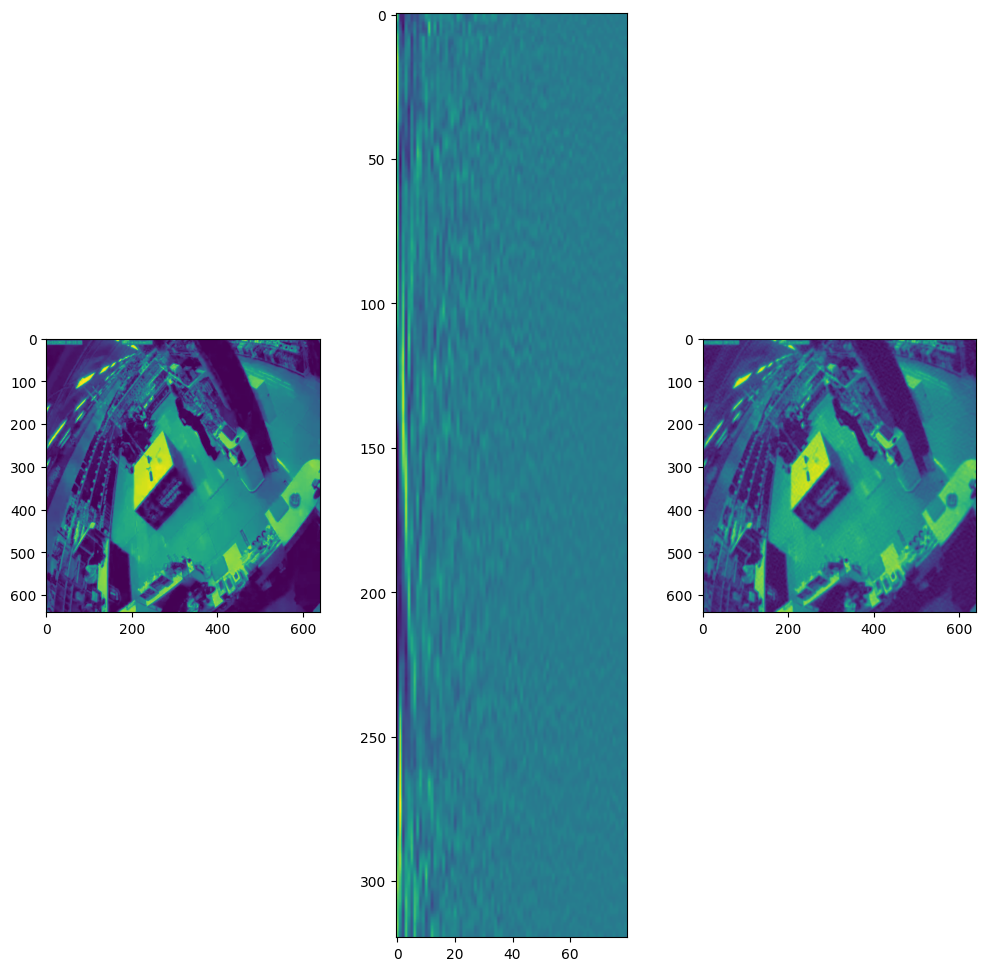

In [10]:
plt.figure(figsize=(12,12))
plt.subplot(1, 3, 1)
plt.imshow(b)
plt.subplot(1, 3, 2)
plt.imshow(transform_b)
plt.subplot(1, 3, 3)
plt.imshow(inverse_transform_b)
plt.show()

In [11]:
import sys
sys.getsizeof(transform_b) / 1024**2 * 8

1.5634765625

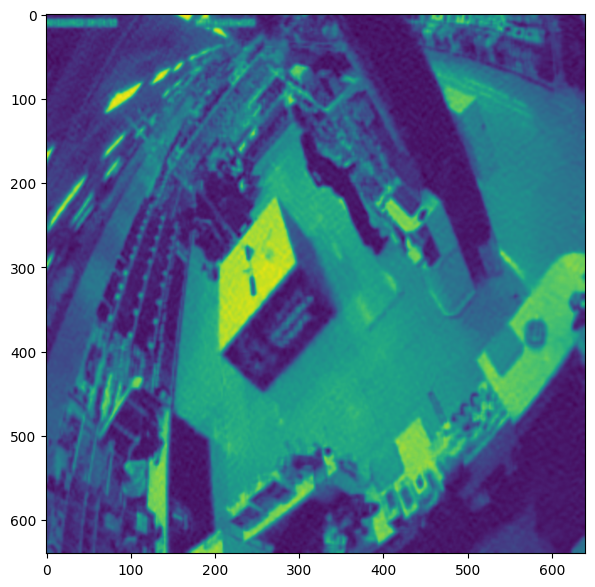

In [12]:
plt.figure(figsize=(7,7))
plt.imshow(inverse_transform_b)
plt.show()

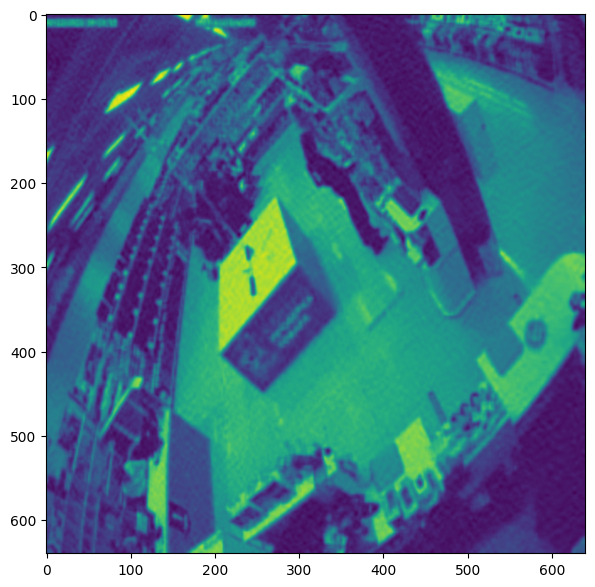

In [13]:
plt.figure(figsize=(7,7))
plt.imshow(inverse_transform_g)
plt.show()

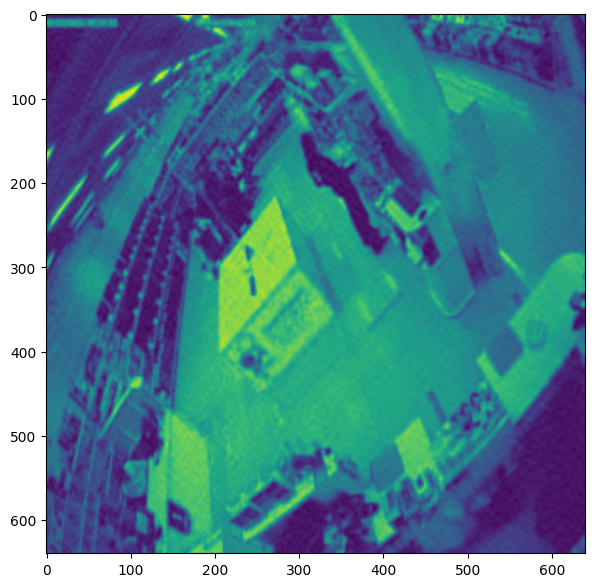

In [14]:
plt.figure(figsize=(7,7))
plt.imshow(inverse_transform_r)
plt.show()

In [15]:
result = cv2.merge([
    inverse_transform_r,
    inverse_transform_g,
    inverse_transform_b,
])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


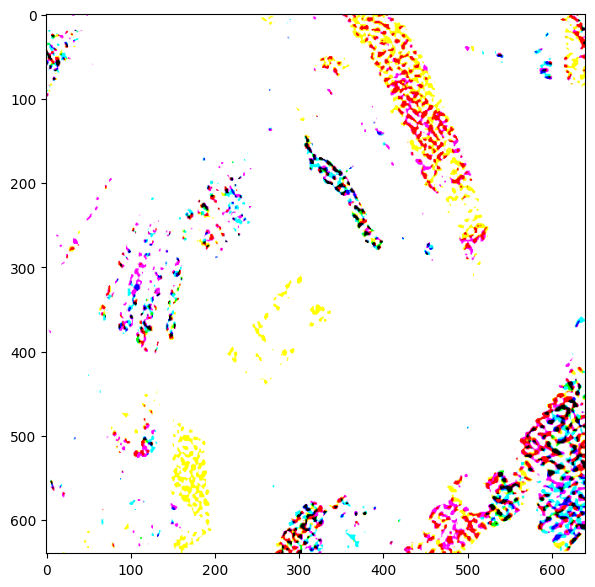

In [16]:
plt.figure(figsize=(7,7))
plt.imshow(result)
plt.show()

In [17]:
cv2.imshow("result", result)
cv2.waitKey(0)
cv2.destroyAllWindows()